# Homework 5

In [1]:
#import os
#os.environ["HTTP_PROXY"]="http://proxy-01.pub.alcf.anl.gov:3128"
#os.environ["HTTPS_PROXY"]="http://proxy-01.pub.alcf.anl.gov:3128"
#os.environ["http_proxy"]="http://proxy-01.pub.alcf.anl.gov:3128"
#os.environ["https_proxy"]="http://proxy-01.pub.alcf.anl.gov:3128"
#os.environ["ftp_proxy"]="http://proxy-01.pub.alcf.anl.gov:3128"

## LLM training and inference using HuggingFace

### Inference

In [2]:
#from transformers import AutoTokenizer,AutoModelForCausalLM, AutoConfig
#input_text = "When I woke up at the"
#from transformers import pipeline
#generator = pipeline("text-generation", model="openai-community/gpt2")
#generator(input_text, max_length=30, num_return_sequences=5)

### Training

In [3]:
#from transformers import TextDataset,DataCollatorForLanguageModeling
#
#def load_dataset(train_path,test_path,tokenizer):
#    train_dataset = TextDataset(
#          tokenizer=tokenizer,
#          file_path=train_path,
#         block_size=128) 
#   test_dataset = TextDataset(
#         tokenizer=tokenizer,
#          file_path=test_path,
#          block_size=128)   
#    data_collator = DataCollatorForLanguageModeling(
#        tokenizer=tokenizer, mlm=False,
#    )
#    return train_dataset,test_dataset,data_collator

In [4]:
#from transformers import AutoTokenizer,AutoModelForCausalLM
#
#tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
#model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")
#
#train_dataset,test_dataset,data_collator = load_dataset('dataset/train_input.txt','dataset/test_input.txt', tokenizer)
#
#from transformers import Trainer, TrainingArguments
#
#training_args = TrainingArguments(
#    output_dir="./gpt2", #The output directory
#    overwrite_output_dir=True, #overwrite the content of the output directory
#    num_train_epochs=3, # number of training epochs
#    per_device_train_batch_size=32, # batch size for training
#    per_device_eval_batch_size=64,  # batch size for evaluation
#    eval_steps = 40, # Number of update steps between two evaluations.
#    save_steps=80, # after # steps model is saved 
#    warmup_steps=50,# number of warmup steps for learning rate scheduler
#    prediction_loss_only=True,
#    )
#
#trainer = Trainer(
#    model=model,
#    args=training_args,
#    data_collator=data_collator,
#    train_dataset=train_dataset,
#    eval_dataset=test_dataset,
#)
#
##trainer.train()

## What is going on below the hood?

In [5]:
#from transformers import GPT2Tokenizer, GPT2LMHeadModel
#model = GPT2LMHeadModel.from_pretrained("openai-community/gpt2")
#print(model)

## General elements of an LLM

In [6]:
### IMPORTS
#
#import torch
#import torch.nn as nn
#from torch.nn import functional as F
#torch.manual_seed(1337)
## hyperparameters
#batch_size = 16 # how many independent sequences will we process in parallel?
#block_size = 32 # what is the maximum context length for predictions?
#max_iters = 5000
#eval_interval = 100
#learning_rate = 1e-3
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
#eval_iters = 200
#n_embd = 64
#n_head = 4 ## so head_size = 16
#n_layer = 4
#dropout = 0.0
## ------------
#
#torch.manual_seed(1337)

## Attention mechanisms

In [7]:
#C = 32 # channels
#head_size = 16
#
#key = nn.Linear(C, head_size, bias=False)
#query = nn.Linear(C, head_size, bias=False)
#value = nn.Linear(C, head_size, bias=False)

In [8]:
#import torch
#import torch.nn as nn
#from torch.nn import functional as F
#torch.manual_seed(1337)
#B,T,C = 4,8,32 # batch, time, channels
#x = torch.randn(B,T,C)
#
## Here we want the wei to be data dependent - ie gather info from the past but in a data dependant way
#
#head_size = 16
#key = nn.Linear(C, head_size, bias=False)
#query = nn.Linear(C, head_size, bias=False)
#value = nn.Linear(C, head_size, bias=False)
#k = key(x)   # (B, T, 16) # each token here (totally B*T) produce a key and query in parallel and independently
#q = query(x) # (B, T, 16)
#v = value(x)
#
#wei =  q @ k.transpose(-2, -1) * head_size**-0.5 # (B, T, 16) @ (B, 16, T) ---> (B, T, T). #
#wei = F.softmax(wei, dim=-1) # exponentiate and normalize giving a nice distibution that sums to 1 and
#                             # now it tells us that in a data dependent manner how much of info to aggregate from
#
#out = wei @ v # aggregate the attention scores and value vector.
#
#print(out[0])

### Let's see attention mechanisms in action!

In [9]:
#from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM
#
#from bertviz import model_view
#utils.logging.set_verbosity_error()  # Suppress standard warnings
#
#model_name = 'openai-community/gpt2'
#input_text = "My son is becoming a tortoise"  
#model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
#tokenizer = AutoTokenizer.from_pretrained(model_name)
#inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
#outputs = model(inputs)  # Run model
#attention = outputs[-1]  # Retrieve attention from model outputs
#tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
#model_view(attention, tokens)  # Display model view

## Positional encoding

In [10]:
#vocab_size = 65
#n_embd = 64
#
#token_embedding_table = nn.Embedding(vocab_size, n_embd)
#block_size = 32 # what is the maximum context length for predictions?
#position_embedding_table = nn.Embedding(block_size, n_embd)

In [11]:
#x = torch.tensor([1,3,15,4,7,1,4,9])
#x = token_embedding_table(x)
#print(x[0])

In [12]:
#x = torch.tensor([1,3,15,4,7,1,4,9])
#x= position_embedding_table(x) + token_embedding_table(x)
#print(x[0])

## Training

In [13]:
#from torch.nn import functional as F
#logits = torch.tensor([0.5, 0.1, 0.3])
#targets = torch.tensor([1.0, 0.0, 0.0])
#loss = F.cross_entropy(logits, targets)
#print(loss)

In [14]:
#perplexity = torch.exp(loss)
#print(perplexity)

## Let's train a mini-LLM from scratch

### Set up hyperparameters:

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

# hyperparameters

batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 10000
eval_interval = 10
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 500
n_vals = [{'n_embd' : 32, 'n_head' : 4, 'n_layer' : 4}, {'n_embd' : 64, 'n_head' : 4, 'n_layer' : 4}, {'n_embd' : 64, 'n_head' : 4, 'n_layer' : 8}, {'n_embd' : 64, 'n_head' : 8, 'n_layer' : 4}, {'n_embd' : 128, 'n_head' : 4, 'n_layer' : 4}]
dropout = 0.0

#n_embd = [32, 64, 64, 64, 128] 
#n_head = [4, 4, 4, 8, 4] so head_size = [8, 16, 16, 8, 32]
#n_layer = [4, 4, 8, 4, 4]

# ------------

### Load in data and create train and test datasets

In [16]:
with open('dataset/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

vocab = {i: ch for ch, i in itos.items()}

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

def tokens_to_text(tokens, vocab):
    return ''.join([vocab[token.item()] for token in tokens])

### Set up the components of the Decoder block: 

In [17]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C) 16,32,16
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd), # Projection layer going back into the residual pathway
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)


### Combine components into the Decoder block

In [18]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))    # Communication
        x = x + self.ffwd(self.ln2(x))  # Computation
        return x

### Set up the full Transformer model 

In [19]:
# super simple language model
class LanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

## Homework

### as we can see increasing n_embd, n_head and n_layers is beneficial as they increase the complexity of the model and helps us to capture a wider range of patterms but also increase computational cost.

In [20]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean().item()
    return out

MODEL HYPERPARAMETERS: {'n_embd': 32, 'n_head': 4, 'n_layer': 4}
Epoch [0/10000], Training Loss: 4.238795757293701, Validation Loss: 4.244536399841309
Epoch [500/10000], Training Loss: 2.481351375579834, Validation Loss: 2.49116587638855
Epoch [1000/10000], Training Loss: 2.3251261711120605, Validation Loss: 2.3390278816223145
Epoch [1500/10000], Training Loss: 2.230419874191284, Validation Loss: 2.2443172931671143
Epoch [2000/10000], Training Loss: 2.1413278579711914, Validation Loss: 2.1818859577178955
Epoch [2500/10000], Training Loss: 2.081956148147583, Validation Loss: 2.1305761337280273
Epoch [3000/10000], Training Loss: 2.019500255584717, Validation Loss: 2.0878288745880127
Epoch [3500/10000], Training Loss: 1.989925742149353, Validation Loss: 2.0508041381835938
Epoch [4000/10000], Training Loss: 1.9575884342193604, Validation Loss: 2.0411577224731445
Epoch [4500/10000], Training Loss: 1.935341477394104, Validation Loss: 2.023369073867798
Epoch [5000/10000], Training Loss: 1.907

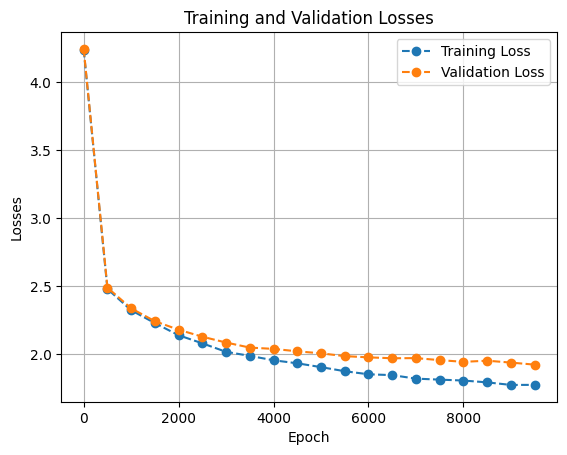

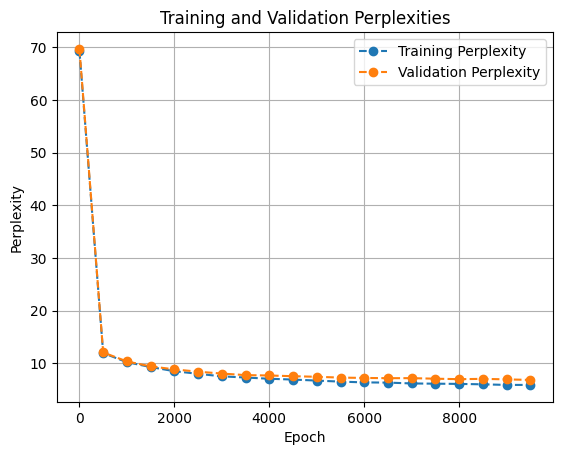

Generated text:
FN-Qd&HbmakyzNG.-LHug3IN'fkw3oERD OFORKEN:
Marce, 'e it the bone. Fase her sit pongue them form the pener flinces dequd to ongle is 

MODEL HYPERPARAMETERS: {'n_embd': 64, 'n_head': 4, 'n_layer': 4}
Epoch [0/10000], Training Loss: 4.150125503540039, Validation Loss: 4.150388717651367
Epoch [500/10000], Training Loss: 2.323106288909912, Validation Loss: 2.3271565437316895
Epoch [1000/10000], Training Loss: 2.120776653289795, Validation Loss: 2.152034282684326
Epoch [1500/10000], Training Loss: 1.9802076816558838, Validation Loss: 2.0467538833618164
Epoch [2000/10000], Training Loss: 1.8791314363479614, Validation Loss: 1.994204044342041
Epoch [2500/10000], Training Loss: 1.8157269954681396, Validation Loss: 1.9544401168823242
Epoch [3000/10000], Training Loss: 1.7669856548309326, Validation Loss: 1.9159578084945679
Epoch [3500/10000], Training Loss: 1.7306604385375977, Validation Loss: 1.8921496868133545
Epoch [4000/10000], Training Loss: 1.7092063426971436, Validation L

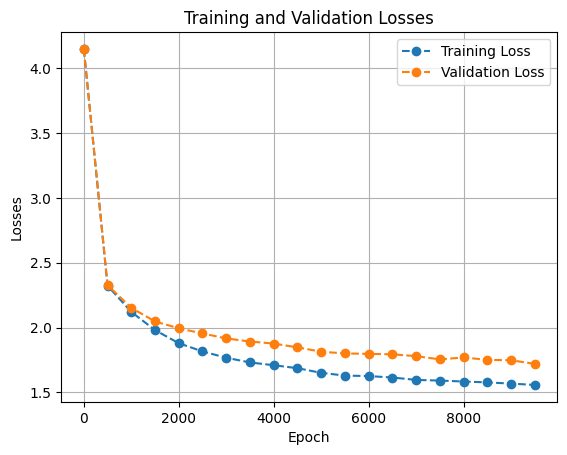

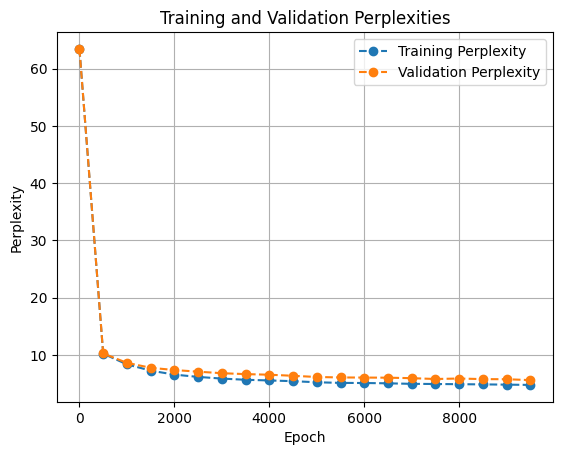

Generated text:
-.oTWMf:ch'DBSNT i$QicYks,syf-:addet for the lady than revenge in the over the king.
Is you are honour spate to much before groums t

MODEL HYPERPARAMETERS: {'n_embd': 64, 'n_head': 4, 'n_layer': 8}
Epoch [0/10000], Training Loss: 4.038938999176025, Validation Loss: 4.0396528244018555
Epoch [500/10000], Training Loss: 2.2677810192108154, Validation Loss: 2.276956558227539
Epoch [1000/10000], Training Loss: 2.0357229709625244, Validation Loss: 2.0906319618225098
Epoch [1500/10000], Training Loss: 1.9133093357086182, Validation Loss: 2.0133185386657715
Epoch [2000/10000], Training Loss: 1.8158305883407593, Validation Loss: 1.9506586790084839
Epoch [2500/10000], Training Loss: 1.7469470500946045, Validation Loss: 1.8898437023162842
Epoch [3000/10000], Training Loss: 1.7016253471374512, Validation Loss: 1.850231409072876
Epoch [3500/10000], Training Loss: 1.6644339561462402, Validation Loss: 1.8268444538116455
Epoch [4000/10000], Training Loss: 1.6365989446640015, Validatio

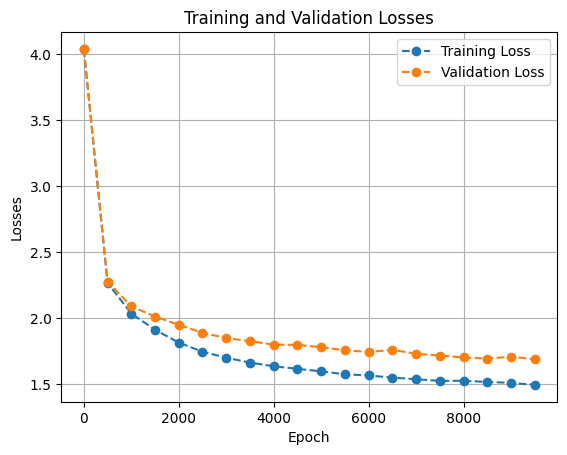

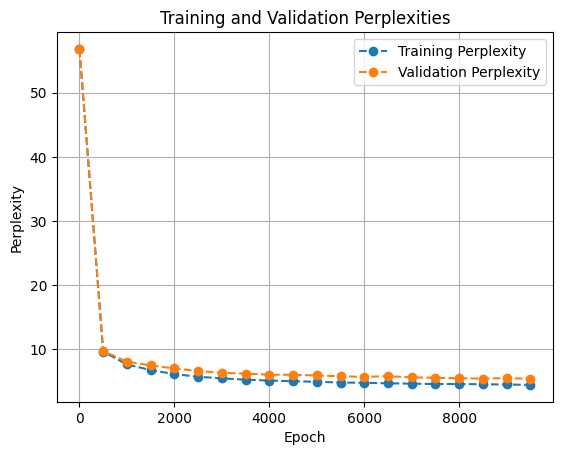

Generated text:
JC tTU 'L-a.HEJSE;?wY-EgxjtrQbPDURY:
No! shience, flist,
There dotived you negry of nothing it;
Ploodys sorry anger forsone?

DORCUS

MODEL HYPERPARAMETERS: {'n_embd': 64, 'n_head': 8, 'n_layer': 4}
Epoch [0/10000], Training Loss: 4.174689769744873, Validation Loss: 4.180120944976807
Epoch [500/10000], Training Loss: 2.3389477729797363, Validation Loss: 2.3563287258148193
Epoch [1000/10000], Training Loss: 2.151392936706543, Validation Loss: 2.186475992202759
Epoch [1500/10000], Training Loss: 2.0108320713043213, Validation Loss: 2.081101179122925
Epoch [2000/10000], Training Loss: 1.9079161882400513, Validation Loss: 2.003117799758911
Epoch [2500/10000], Training Loss: 1.8412209749221802, Validation Loss: 1.9563673734664917
Epoch [3000/10000], Training Loss: 1.794445276260376, Validation Loss: 1.9298479557037354
Epoch [3500/10000], Training Loss: 1.749207615852356, Validation Loss: 1.9060102701187134
Epoch [4000/10000], Training Loss: 1.7215056419372559, Validation Los

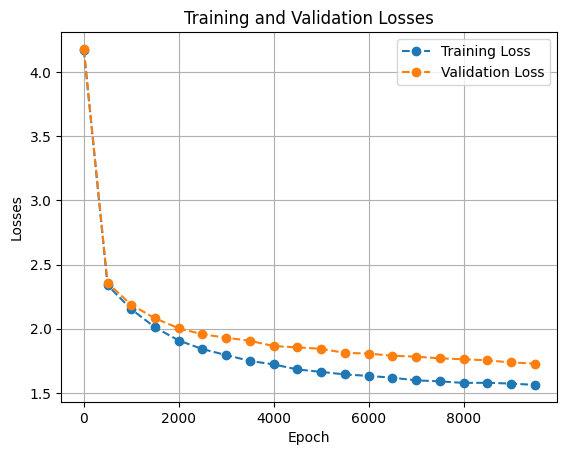

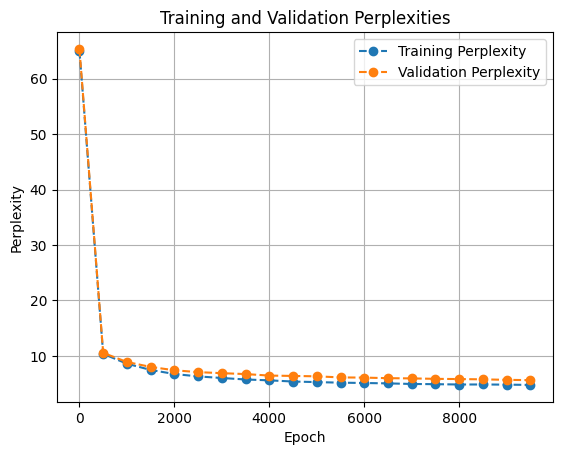

Generated text:
?klOn ,YYC:LzmWR;jcWFxKjoLDUIC:But you have pricusion and thrust:
Do not are gents, she gix to my eyechts, once, this but what's tim

MODEL HYPERPARAMETERS: {'n_embd': 128, 'n_head': 4, 'n_layer': 4}
Epoch [0/10000], Training Loss: 3.9003260135650635, Validation Loss: 3.9186322689056396
Epoch [500/10000], Training Loss: 2.0906805992126465, Validation Loss: 2.129234790802002
Epoch [1000/10000], Training Loss: 1.889889121055603, Validation Loss: 1.996250033378601
Epoch [1500/10000], Training Loss: 1.7767333984375, Validation Loss: 1.8926337957382202
Epoch [2000/10000], Training Loss: 1.6960943937301636, Validation Loss: 1.8477747440338135
Epoch [2500/10000], Training Loss: 1.6525408029556274, Validation Loss: 1.8066617250442505
Epoch [3000/10000], Training Loss: 1.6199448108673096, Validation Loss: 1.7860312461853027
Epoch [3500/10000], Training Loss: 1.5950452089309692, Validation Loss: 1.7470399141311646
Epoch [4000/10000], Training Loss: 1.5602729320526123, Validation 

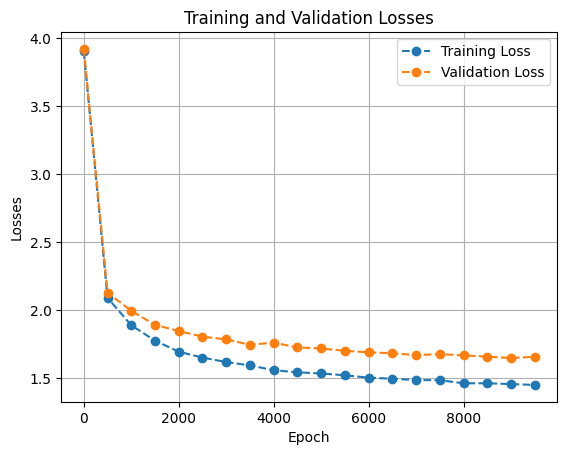

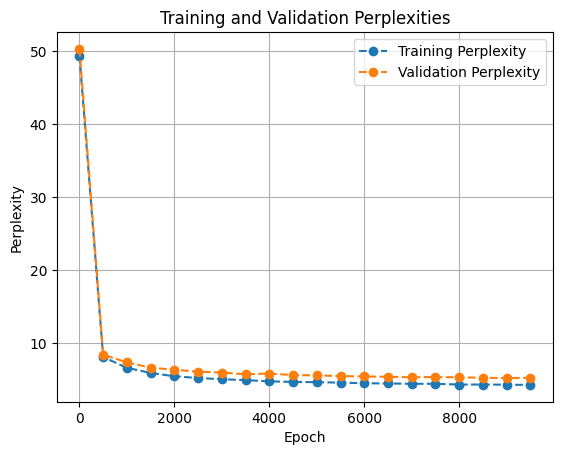

Generated text:
,AI-:LJbhHyzbNC oK Bx'nHUN$gD$LLINGBROKE:
All endure it honour?

ROMEO:
Why, fight then high, take of meet?
Was flowering, if firl t



In [21]:
import matplotlib.pyplot as plt
import math

for n_val in n_vals:

    t_perp = []
    v_perp = []
    t_loss = []
    v_loss = []
    epochs = []
    
    n_embd = n_val['n_embd'] 
    n_head = n_val['n_head']
    n_layer = n_val['n_layer']
    
    model = LanguageModel().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    print('\033[1m' + f"MODEL HYPERPARAMETERS: {n_val}" + '\033[0m')

    for epoch in range(max_iters):
        model.train()
        optimizer.zero_grad()
        x, y = get_batch('train')
        logits, loss = model(x, y)
        loss.backward()
        optimizer.step()
        
        #if epoch % eval_interval == 0:
            #print(f"Epoch [{epoch}/{max_iters}], Loss: {loss.item()}")
            
        if epoch % eval_iters == 0:
            with torch.no_grad():
                train_losses, val_losses = estimate_loss().values()
                train_perps = math.exp(train_losses)
                val_perps = math.exp(val_losses)
                t_loss.append(train_losses)
                v_loss.append(val_losses)
                t_perp.append(train_perps)
                v_perp.append(val_perps)
                epochs.append(epoch)
                
                
            print(f"Epoch [{epoch}/{max_iters}], Training Loss: {train_losses}, Validation Loss: {val_losses}")
            
    plt.plot(epochs, t_loss, label='Training Loss', linestyle='--', marker='o')
    plt.plot(epochs, v_loss, label='Validation Loss', linestyle='--', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Losses')
    plt.title('Training and Validation Losses')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.plot(epochs, t_perp, label='Training Perplexity', linestyle='--', marker='o')
    plt.plot(epochs, v_perp, label='Validation Perplexity', linestyle='--', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Perplexity')
    plt.title('Training and Validation Perplexities')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    model.eval()
    initial_input = torch.randint(0, vocab_size, (1, block_size)).to(device)
    generated_text = model.generate(initial_input, max_new_tokens=100)
    generated_text_str = tokens_to_text(generated_text[0], itos) 
    print("Generated text:")
    print(generated_text_str)
    print()